In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("https://raw.githubusercontent.com/benjamin-chan/MedicareProviderCharge/master/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [40]:
print(df.columns)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments '],
      dtype='object')


In [41]:
print(df['DRG Definition'].unique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '069 - TRANSIENT ISCHEMIA'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'
 '208 - RES

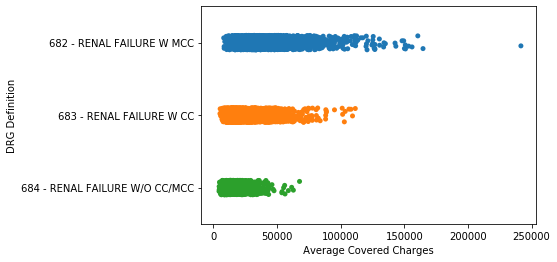

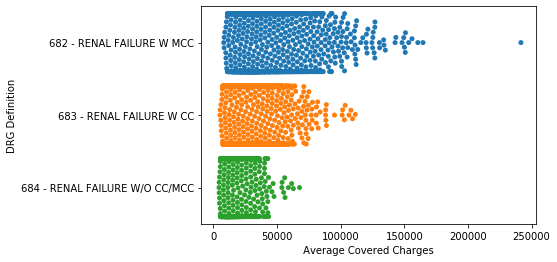

In [43]:
df['DRG']=df['DRG Definition'].str[:3]
df['DRG']=df['DRG'].astype('category')
#print(df['DRG'])

#dict={" Average Covered Charges ":"Average Covered Charges"}

#df=df.rename(columns=dict,inplace=True)
#print(df)

filter =df['DRG'].isin(['682','683','684'])
#print(df[filter])
sns.stripplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ",jitter=True)
plt.show()

sns.swarmplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()



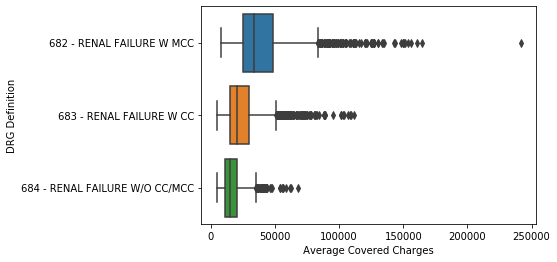

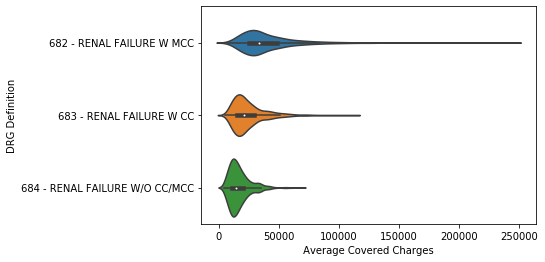

In [44]:
sns.boxplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()

sns.violinplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


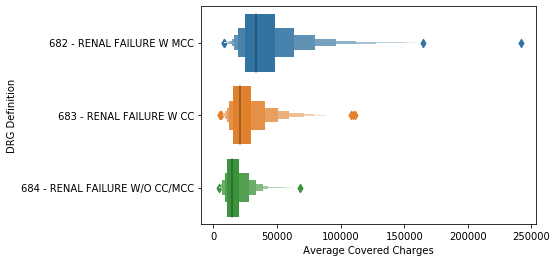

In [45]:
sns.lvplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

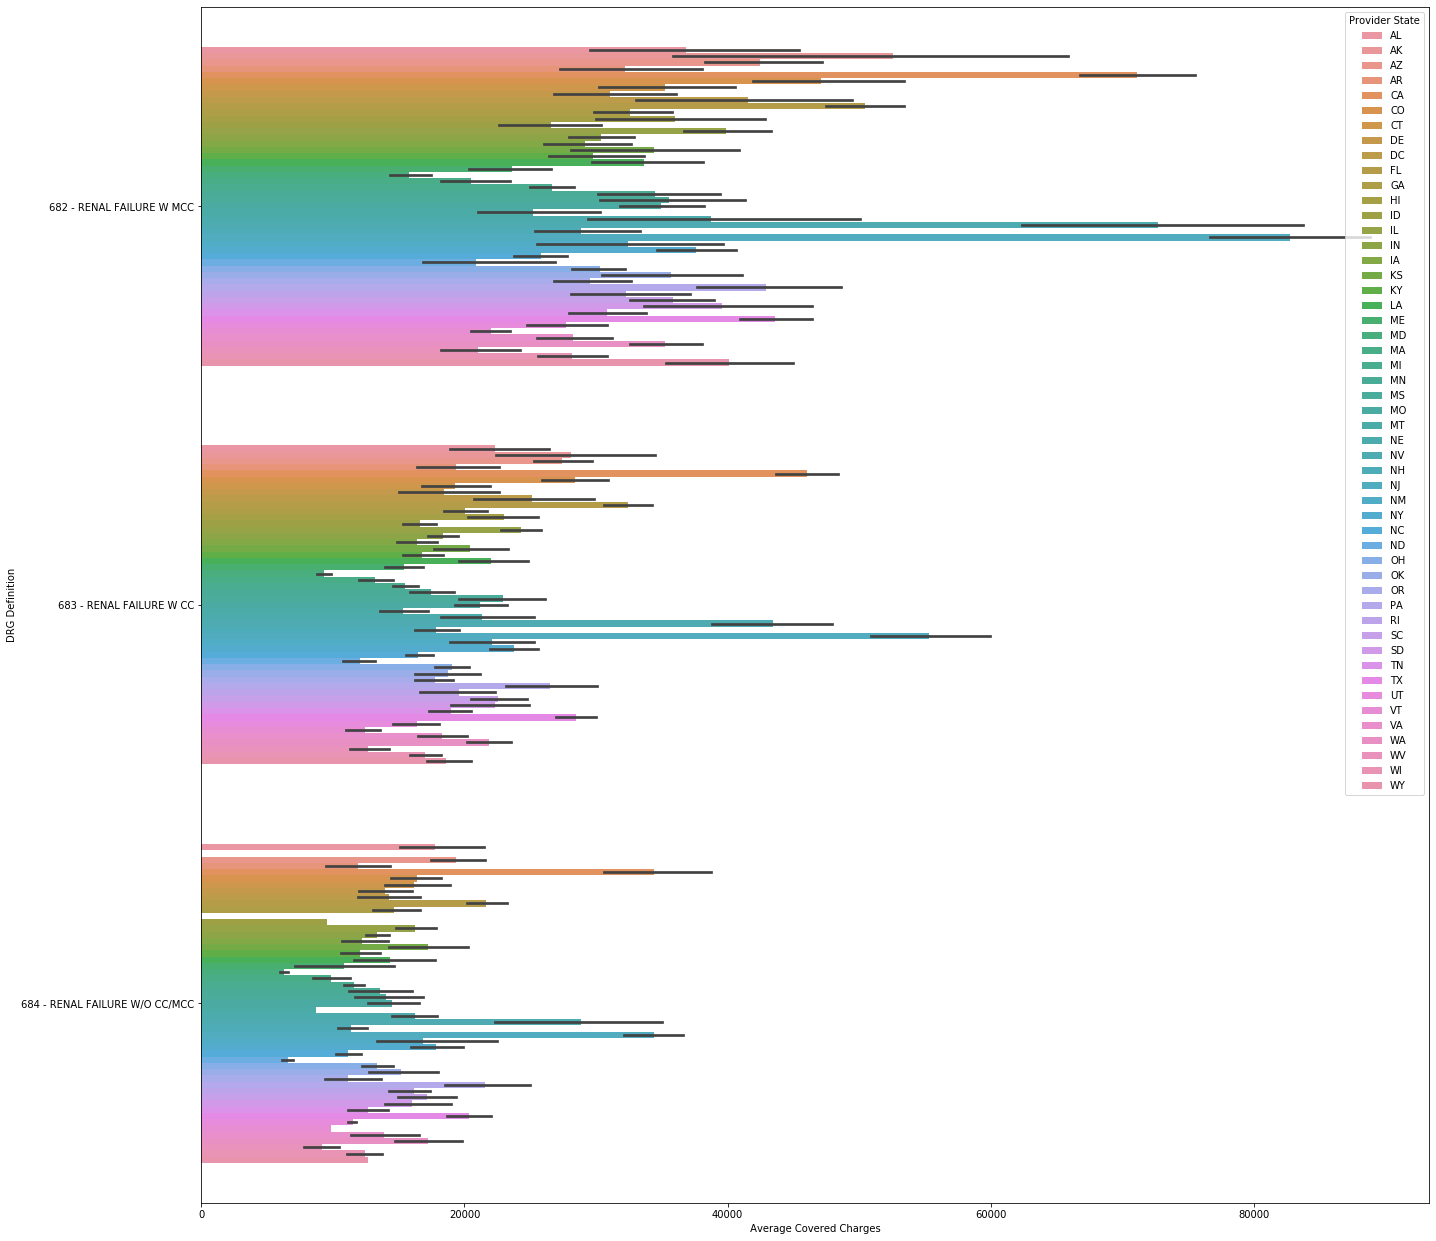

In [50]:
plt.figure(figsize=(22,22))

sns.barplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ", hue='Provider State')
plt.show()

print("medicare costs vary from state to state")

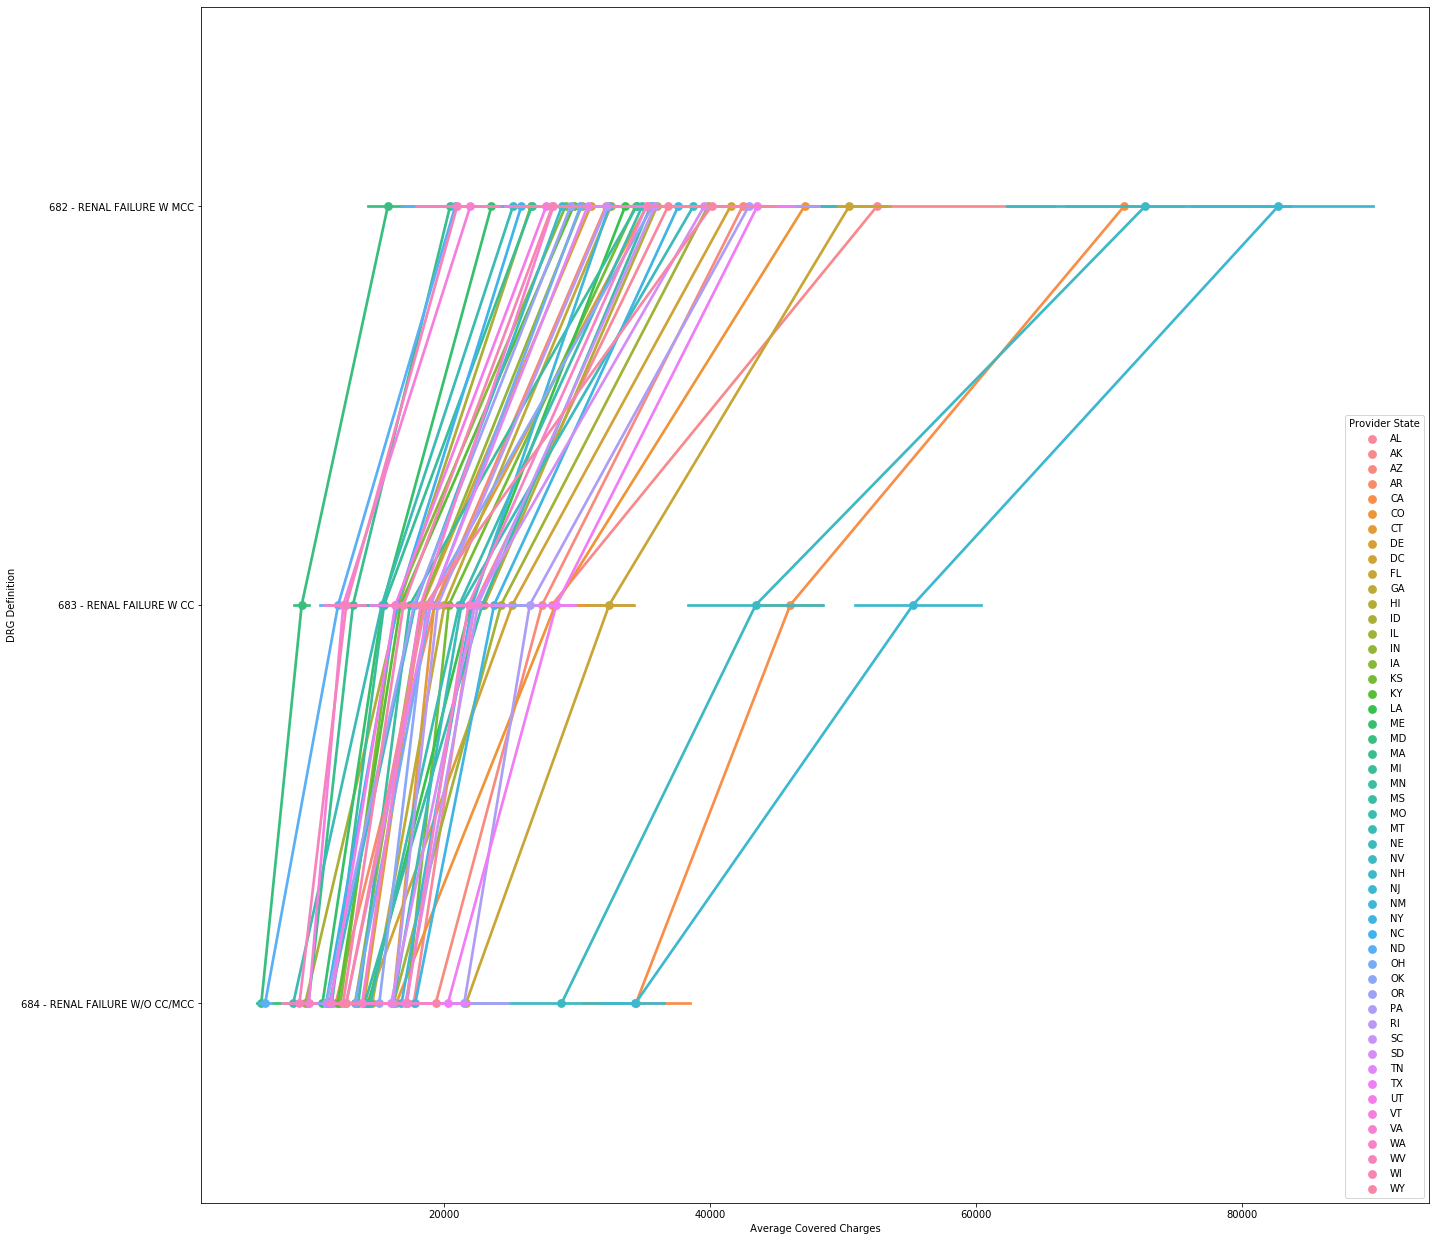

In [53]:
plt.figure(figsize=(22,22))

sns.pointplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ", hue='Provider State')
plt.show()

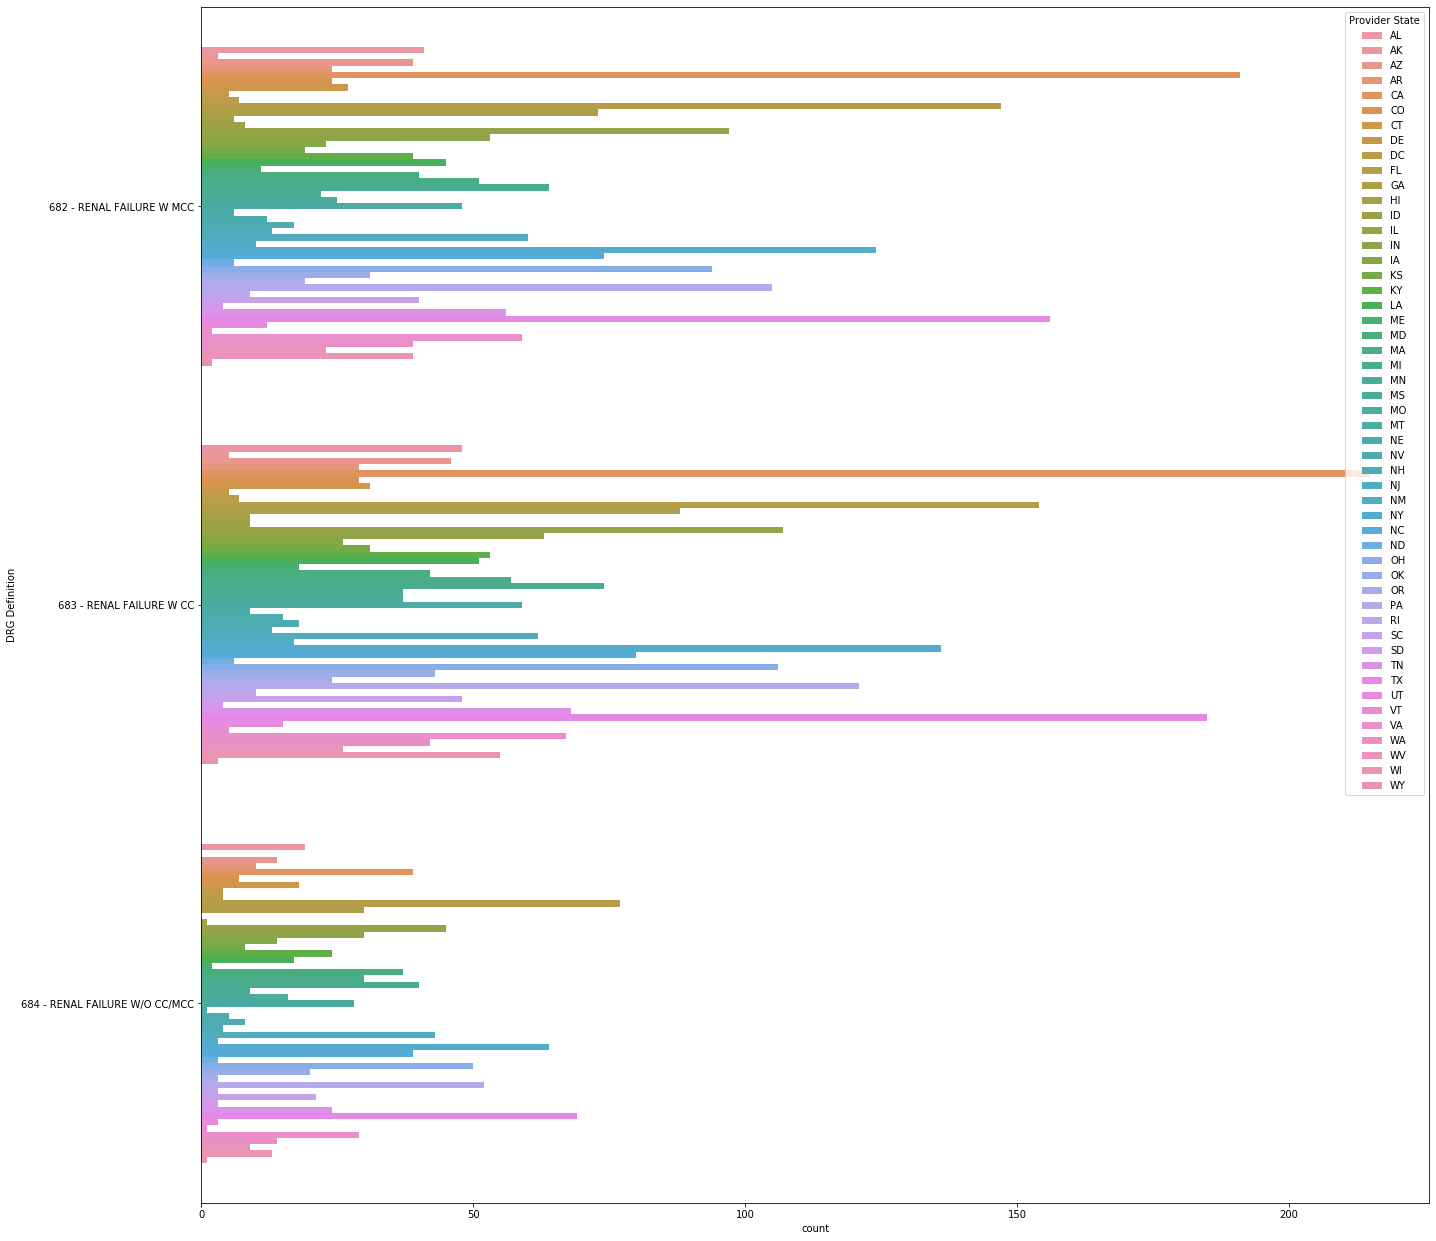

In [55]:
plt.figure(figsize=(22,22))

sns.countplot(data=df[filter], y="DRG Definition", hue='Provider State')
plt.show()

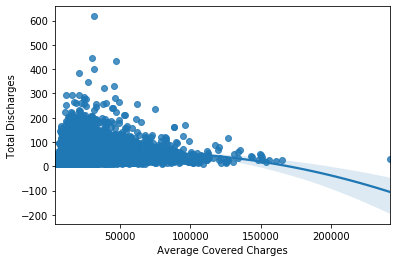

In [57]:

sns.regplot(data=df[filter], y=' Total Discharges ', x=" Average Covered Charges ", order=2)
plt.show()

#order greater than 1 will create a polynomial

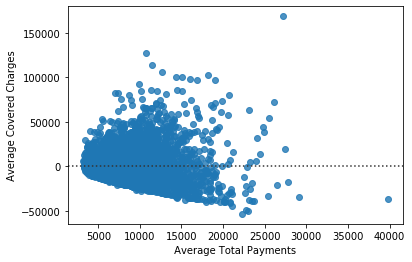

In [59]:
sns.residplot(data=df[filter],y=' Average Covered Charges ',
       x=' Average Total Payments ', order=2)
plt.show()